In [57]:
#data manipulation
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
#access to my drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/foodhub_order.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
#question 1:
print('rows:', df.shape[0], 'columns:', df.shape[1])

rows: 1898 columns: 9


In [ ]:
#question 2: datatypes = float, intigers, object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
#question 3: missing values none
missing_values = df.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [ ]:
#question 4: Statistical Summary
summary = df.describe()
summary

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
#question 5: Orders not rated
count_no_rating = df[df['rating'] == 'Not given'].shape[0]
print('Number of orders not rated:', count_no_rating)

Number of orders not rated: 736


In [ ]:
df['rating'] = df['rating'].replace(['Not given'], np.nan)
df['rating'] = df['rating'].astype(float)
filtered_df = df.dropna(subset=['rating'])

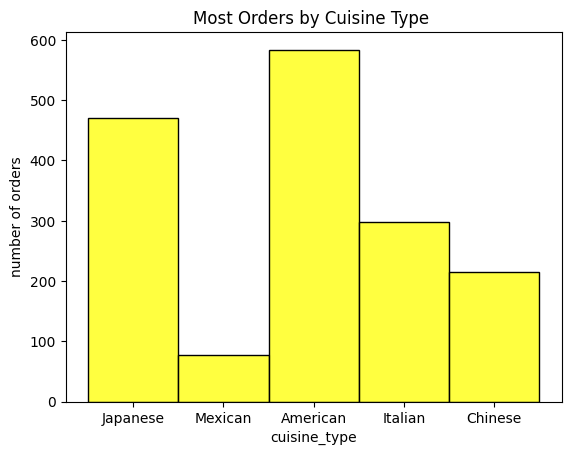

In [ ]:
#question 6:
top_5_cuisines = df['cuisine_type'].value_counts().head(5).index.tolist()
sns.histplot(data=df[df['cuisine_type'].isin(top_5_cuisines)], x='cuisine_type', color= 'yellow')
plt.xlabel('cuisine_type')
plt.ylabel('number of orders')
plt.title('Most Orders by Cuisine Type ')
plt.show()


In [ ]:
from pandas.core.algorithms import unique
unique_restaurants = filtered_df['restaurant_name'].unique()
unique_restaurants
restaurant_counts = filtered_df['restaurant_name'].value_counts()
restaurant_counts
print('Top 5 restaurants in terms of orders:', restaurant_counts.head())

Top 5 restaurants in terms of orders: Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Name: restaurant_name, dtype: int64


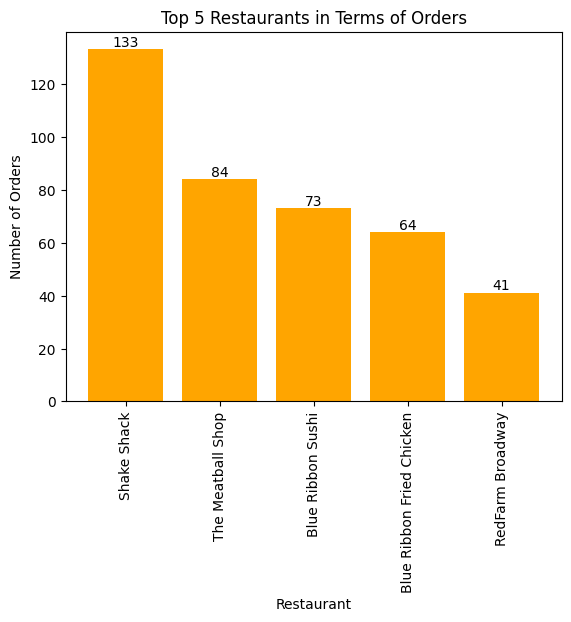

In [ ]:
restaurant_counts = filtered_df['restaurant_name'].value_counts().head(5)
for i, count in enumerate(restaurant_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.bar(restaurant_counts.index, restaurant_counts.values, color= 'orange')
plt.xlabel('Restaurant')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants in Terms of Orders')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#question 7:
from pandas.core.algorithms import unique
unique_cuisines = filtered_df['cuisine_type'].unique()
unique_cuisines
cuisine_counts = filtered_df['cuisine_type'].value_counts()
cuisine_counts
print('Top 5 cuisines in terms of orders:', cuisine_counts.head())

Top 5 cuisines in terms of orders: American    368
Japanese    273
Italian     172
Chinese     133
Indian       50
Name: cuisine_type, dtype: int64


In [ ]:
from pandas.core.algorithms import unique
unique_cuisines = filtered_df['cuisine_type'].unique()
unique_cuisines
cuisine_counts = filtered_df['cuisine_type'].value_counts()
cuisine_counts
print('Last 5 cuisines in terms of orders:', cuisine_counts.tail())

Last 5 cuisines in terms of orders: French        10
Thai           9
Korean         9
Spanish        6
Vietnamese     5
Name: cuisine_type, dtype: int64


In [ ]:
#question 8: American Cuisine is the most popular on weekends
weekend_data = df[df['day_of_the_week'] == 'weekend'].value_counts()
popular_cuisine = df['cuisine_type'].value_counts().head(1)
print("The most popular cuisine on weekends is:", popular_cuisine, weekend_data)

The most popular cuisine on weekends is: American    584
Name: cuisine_type, dtype: int64 Series([], dtype: int64)


In [ ]:
#question 9: Percentage of orders that cost more than $20
percentage = (df[df['cost_of_the_order']>20]['cost_of_the_order'].count()/df['cost_of_the_order'].count())*100
print(f"Percentage of orders that cost more than $20: {percentage:.2f}%")

Percentage of orders that cost more than $20: 29.24%


In [ ]:
#question 10: Mean of Order Delivery Time
mean_delivery_time = df['delivery_time'].mean()
print("The mean order delivery time is:", mean_delivery_time)

The mean order delivery time is: 24.161749209694417


In [ ]:
#question 11: Top 3 customers
top_customers = df['customer_id'].value_counts().head(3)
print('Top 3 most frequent customers:', top_customers)

Top 3 most frequent customers: 52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


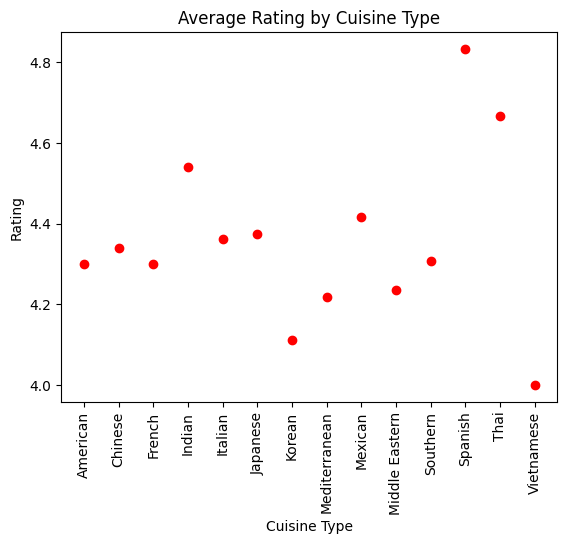

In [ ]:
#question 12: multivariate analysis
grouped = filtered_df.groupby('cuisine_type')['rating'].mean()

plt.scatter(grouped.index, grouped.values, color = 'red')
plt.xlabel('Cuisine Type')
plt.ylabel('Rating')
plt.title('Average Rating by Cuisine Type')
plt.xticks(rotation=90)
plt.show()

<Axes: >

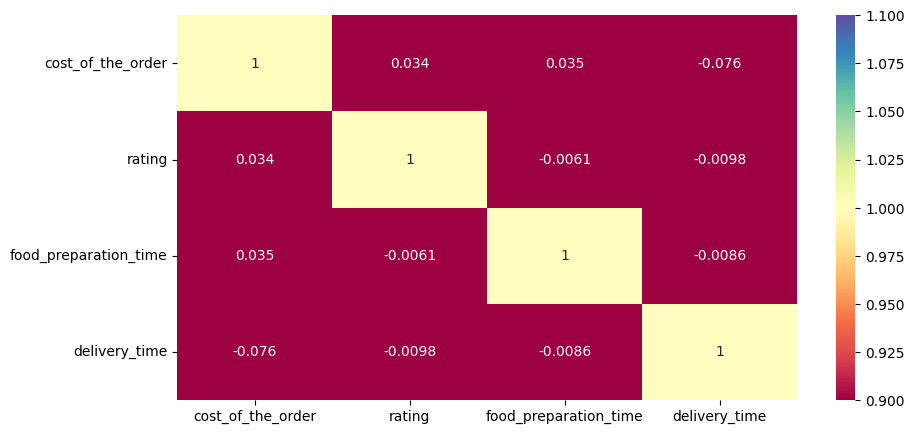

In [58]:
columns_to_exclude = ['order_id', 'customer_id']
df_subset = filtered_df.drop(columns_to_exclude, axis=1)

plt.figure(figsize=(10,5))
sns.heatmap(df_subset.corr(), annot=True, cmap='Spectral', vmin= 1, vmax=1)

In [ ]:
#question 13: Rating counts and Avg rating
rating_count = filtered_df['rating'].count()
print('Rating count is', rating_count)

average_rating = filtered_df['rating'].mean()
print('Rating average is', average_rating)

Rating count is 1162
Rating average is 4.344234079173838


In [ ]:
#question 14: Net Revenue
net_revenue = (df[df['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.75).sum() + (df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'] * 0.85).sum()

print("Net revenue generated by the company: $", net_revenue)

Net revenue generated by the company: $ 25105.777


In [ ]:
#question 15: Food delivery and preparation >60
total_time = df['delivery_time'] + df['food_preparation_time']
percentage_orders = (total_time[total_time > 60].count() / total_time.count()) * 100
print("Percentage of orders taking more than 60 minutes to deliver: {:.2f}%".format(percentage_orders))

Percentage of orders taking more than 60 minutes to deliver: 10.54%


In [ ]:
#question 16: Mean delivery time weekday and weekends
mean_weekday_delivery_time = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_weekend_delivery_time = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print("Mean delivery time on weekdays:", mean_weekday_delivery_time)
print("Mean delivery time on weekends:", mean_weekend_delivery_time)

Mean delivery time on weekdays: 28.340036563071298
Mean delivery time on weekends: 22.4700222057735


**Question 17**
Conclusion: In this analysis we can see that American cuisine and Japanese are the most popular according the number of orders. The most popular by rating is Spanish cuisine. The restaurant with the most orders is Shake Shack.

The rating doesn't seem to matter as much as the order count as Spanish cuisine has one of the lowest order counts. The cuisine type with least orders was Vietnamese.

Recommendation: My recommendation is that they look at the biggest differences between the top and least ordered places and see the main correlations. Delivery and preparation times didn't seem to have an impact in order numbers. It seems that people like what they are used to which is American food. So, other business have to adapt to their population and what they enjoy eating. However, it also comes down on how they market their business and if they market it right then people will go out of their comfort zone to try new things. Business have to adapt to new social media like TikTok and Instagram to promote their businesses, because they can have good food but if no one knows about them they won't sell.

In [59]:
import nbformat
from nbconvert import HTMLExporter

# Read the notebook file
with open('FoodHub_2.ipynb', 'r') as f:
    nb = nbformat.read(f, as_version=4)

# Create an HTMLExporter instance
html_exporter = HTMLExporter()

# Convert the notebook to HTML
(body, resources) = html_exporter.from_notebook_node(nb)

# Save the HTML output to a file
with open('FoodHub_2.html', 'w', encoding='utf-8') as f:
    f.write(body)

!jupyter nbconvert --to html FoodHub_2.ipynb



[NbConvertApp] Converting notebook FoodHub_2.ipynb to html
[NbConvertApp] Writing 792471 bytes to FoodHub_2.html
